<a href="https://colab.research.google.com/github/Mahi200728/DataScience-A2/blob/main/Javi_MaheU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context



In this project I am trying to figure out the amount of bills that were introduced to the senate and got a vote.

This is super important because bills are the way we propose new laws or changes to already existing laws and the lack of voting causes our system to be much slower. To better understand this system I wanted to see how many bills proposed were voted on. This is really important because it shows us an insight into the effiency of our country. Lack of efficeny is a huge issue when looking at world politics and our countries stance in the world since a delay in our poltical sphere can negativly affect our standing in global politics as well as global economics.

# Posterior Predictive Graphs aka The Code

In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.

In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

In [ ]:
url_votes = 'https://raw.githubusercontent.com/Mahi200728/DataScience-A2/refs/heads/main/Untitled%20spreadsheet%20-%20Sheet1.csv'
data_votes = pd.read_csv(url_votes)

This is a list of the total amount of bills that got voted on over a two year period. Essential each data point is the amount of bills that got voted on over two years and this data goes back to 1973-1974. Source: https://www.govtrack.us/congress/bills/statistics

In [ ]:
data_votes

(array([1., 2., 2., 6., 6., 4., 1., 1., 0., 2.]),
 array([390. , 437.7, 485.4, 533.1, 580.8, 628.5, 676.2, 723.9, 771.6,
        819.3, 867. ]),
 <BarContainer object of 10 artists>)

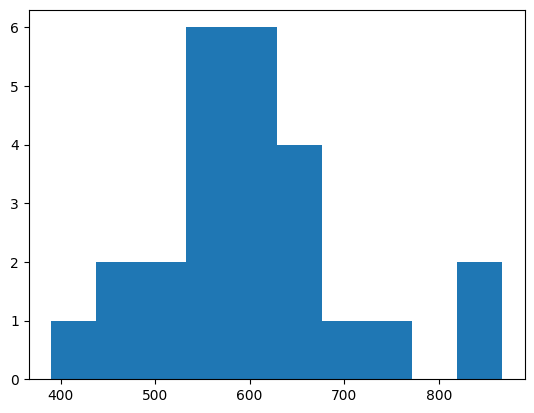

In [ ]:
plt.hist(data_votes)

The histogram is decently normal looking with the median being around 600 but there are two outliers beyond the 800s which causes it to be slightly skewed to the right.

In [ ]:
#N for normal
with pm.Model() as model_votesN:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.Uniform('μ', lower=350, upper=870)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=50)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_votes)
    idata_votesN = pm.sample()

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:02

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

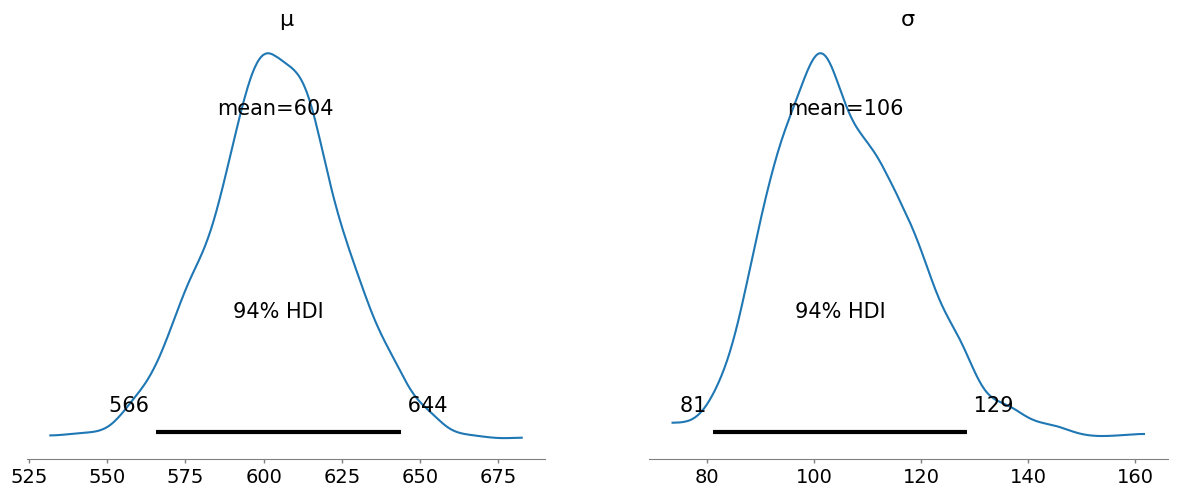

In [ ]:
az.plot_posterior(idata_votesN)

In [ ]:
pm.sample_posterior_predictive(idata_votesN, model=model_votesN, extend_inferencedata=True)

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:00

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

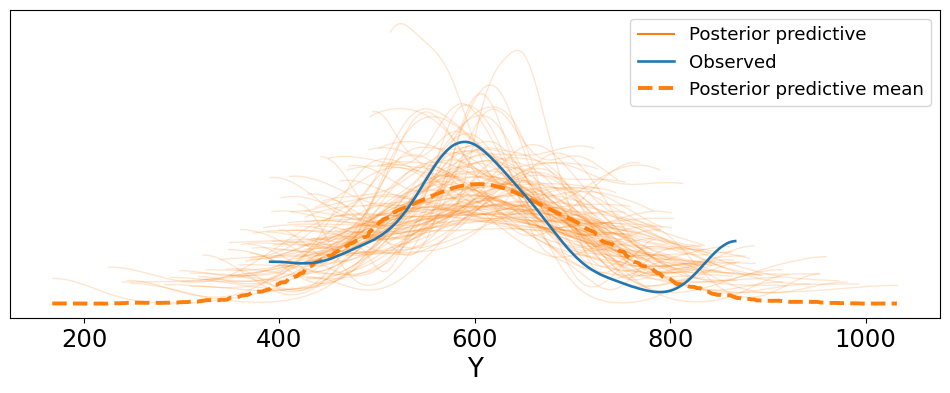

In [ ]:
az.plot_ppc(idata_votesN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

I honestly don't really have a reasoning as to why I decided to do a normal distribution. That being said the normal distribution typically is used when the data is symmetical but my data is skewed to the right due to the outlires around the 800s so this graph didn't fit my data correctly (the really high peak and the bend we see around the 800s from the observed data line compared to the posterior predictive mean).

In [ ]:
#T is for Student's T distribution
with pm.Model() as model_votesT:
    # weak prior
    μ = pm.Uniform('μ', lower=350, upper=870)

    #the same as before
    σ = pm.HalfNormal('σ', sigma=50)

    #this is our normality parameter; lam = 1/30 gives a mean of 30
    ν = pm.Exponential('ν', lam = 1/600)

    #new likelihood, same data
    y = pm.StudentT('y', mu=μ, sigma=σ, nu = ν, observed=data_votes)
    idata_votesT = pm.sample()

Sampling chain 1, 1 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:05

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'ν'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

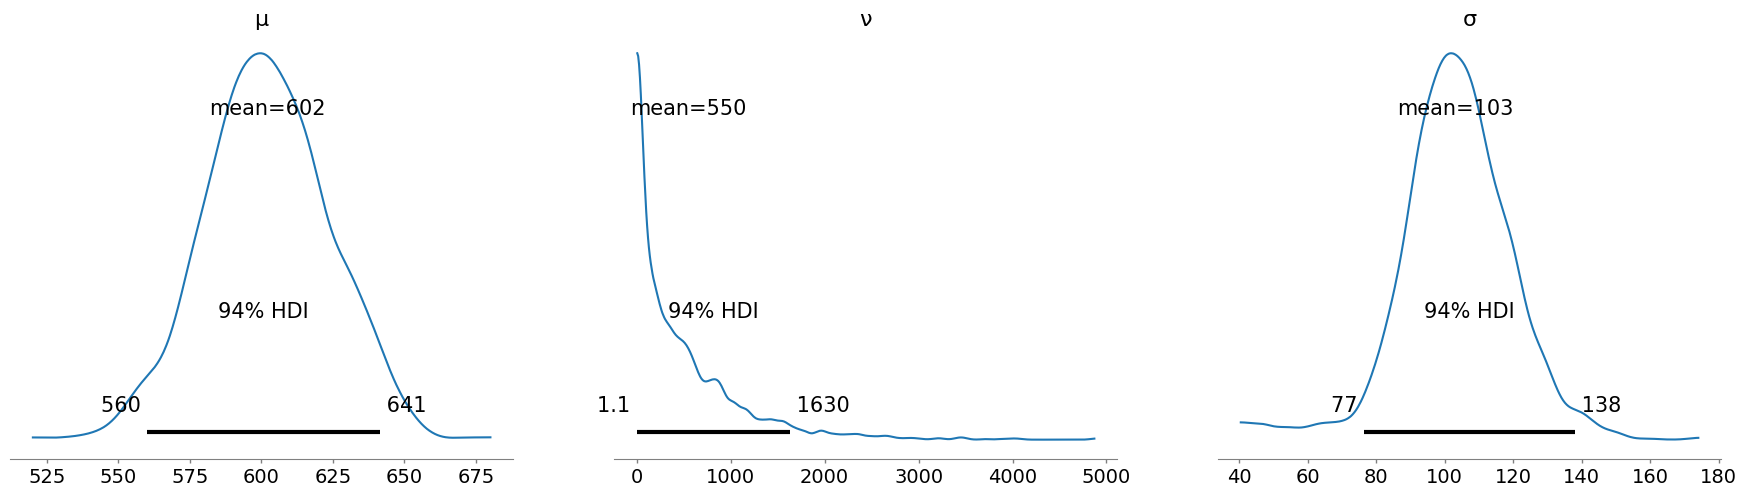

In [ ]:
az.plot_posterior(idata_votesT)

In [ ]:
pm.sample_posterior_predictive(idata_votesT, model=model_votesT, extend_inferencedata=True)

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:00

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(350.0, 870.0)

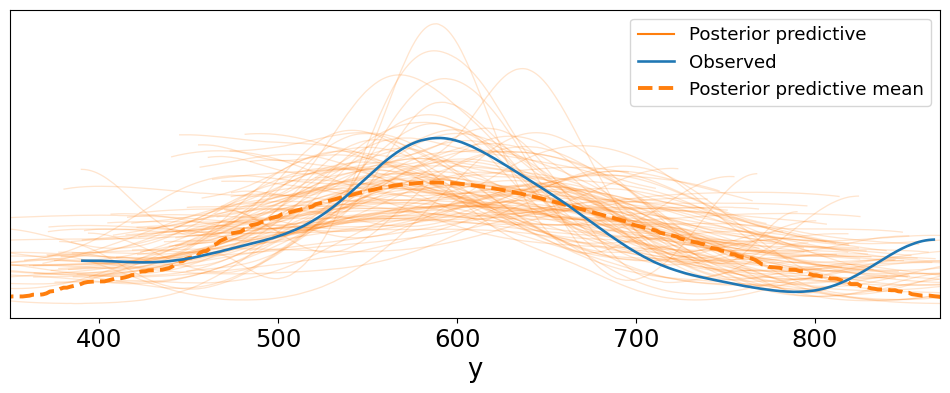

In [ ]:
ax = az.plot_ppc(idata_votesT, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(350, 870)

I decided to try Student's T distribution because I thought it would be better equiped to handle the skewness of my data since it allows you to choise lam values which helps adapt to the lack of normality in my data. This one did work a bit better but it still was off due to the differnces between my assumption and the actual data.

In [ ]:
#ST is for skew T
with pm.Model() as model_votesST:
    #same weak prior
    μ = pm.Uniform('μ', lower=350, upper=870)

    #same as before
    σ = pm.HalfNormal('σ', sigma=50)

    #when a is larger than b, the dist. is positively skewed
    a = pm.Gamma('a', alpha=21, beta=12)
    b = pm.Gamma('b', alpha=15, beta=10)

    # I had to research ways to make a and b more flexiable but the code isn't copied from another source.

    #SkewStudentR, which is the same as a T, except with more unusually high
    #or unusually low values.
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=data_votes)
    idata_votesST = pm.sample()

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:06

In [ ]:
pm.sample_posterior_predictive(idata_votesST, model=model_votesST, extend_inferencedata=True)

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:00

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(350.0, 870.0)

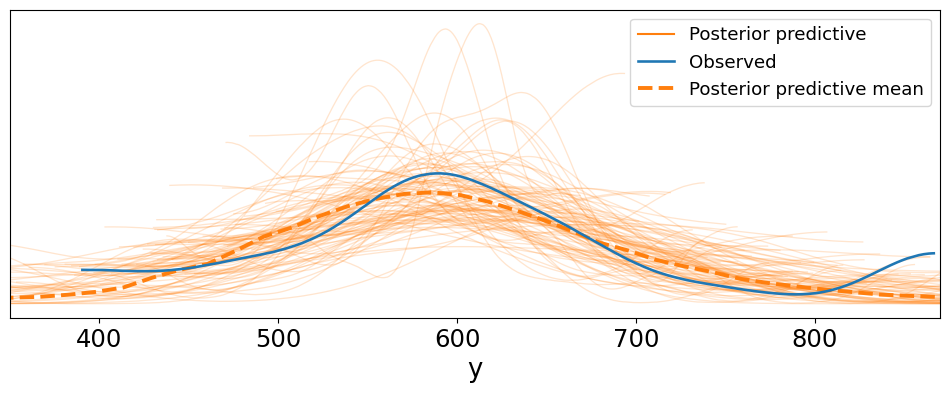

In [ ]:
ax = az.plot_ppc(idata_votesST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(350, 870)

I decided to use Skew Student T distribution because it is better designed and equipped to handle skewness by being able to toggle the a and b variables. I had to shift from the typical A and B values because they weren't encompassing the data as a whole and so instead I decided to use pm.Gamma instead of pm.HalfNormal because it provides more flexability to capture the skewness. Alpha controls shape while Beta controls rate and so being able to toggle each variable individually helped fix the overall shape of the graph to better fit the skewness. So when alpha is greater than one it helps the distribution be less skewed and the same is for beta where a bigger beta value helped concentrate the values into a smaller area which is really benifical when we look at the size of my data.  

# Conclusion

Based on these three distributions (SkewStudentT) most of all I can tell that this data isn't very normal and specifically that the right skew statistically shows that there are a lot more higher number of bills voted on than there are lower number of bills voted on. This honestly is a bit different than what I thought because in context with both the data I saw and the last project I assumed there weren't that many bills getting voted on. Now obviously that is incorrect and I find the data a bit shocking but I also don't think it is imporbable (I was just a bit biased because of the last project and my prior knowledge). I also think my data as a whole was a bit off because my data pool is only 25ish which is definetly on the lower side and I think that put an enlarged emphasis on the 800s data points. If we had a bigger data set I think my data would be a bit more normal and I think that curve around the 800s wouldn't be as prominent. I also think there is a posiblity of another PPC being better suited for this which I totally understand and I think my limited knowledge definetly affected the outcomes of this project.